# WINE QUALITY PREDICTION :

<b>Description : </b>The focus is on predicting the quality of wine based on its chemical characteristics, offering a
real-world application of machine learning in the context of viticulture. The dataset
encompasses diverse chemical attributes, including density and acidity, which serve as the
features for three distinct classifier models.


<b>Key Concepts and Challenges:</b></br>

1.) Classifier Models: Utilizing Random Forest, Stochastic Gradient Descent, and SupportVector Classifier (SVC) for wine quality prediction.</br>
2.) Chemical Qualities: Analyzing features like density and acidity as predictors for wine quality.</br>
3.) Data Analysis Libraries: Employing Pandas for data manipulation and Numpy for array operations.</br>
4.) Data Visualization: Using Seaborn and Matplotlib for visualizing patterns and insights in the dataset.</br>

### Import Libraries :

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC

### Read the Dataset :

In [5]:
df = pd.read_csv('WineQT.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


### Data PreProcessing :

In [7]:
## Checking Null Values :

df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [8]:
## Checking Duplicacy :

df.duplicated().sum()

0

In [9]:
## Checking DataTypes :

df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
Id                        int64
dtype: object

In [10]:
### As, ID column is useless, so we can drop this column from our data :

df.drop(columns=['Id'],axis=1,inplace=True)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [11]:
## Checking Data Consistency :

df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### EDA / Data Visualisation :

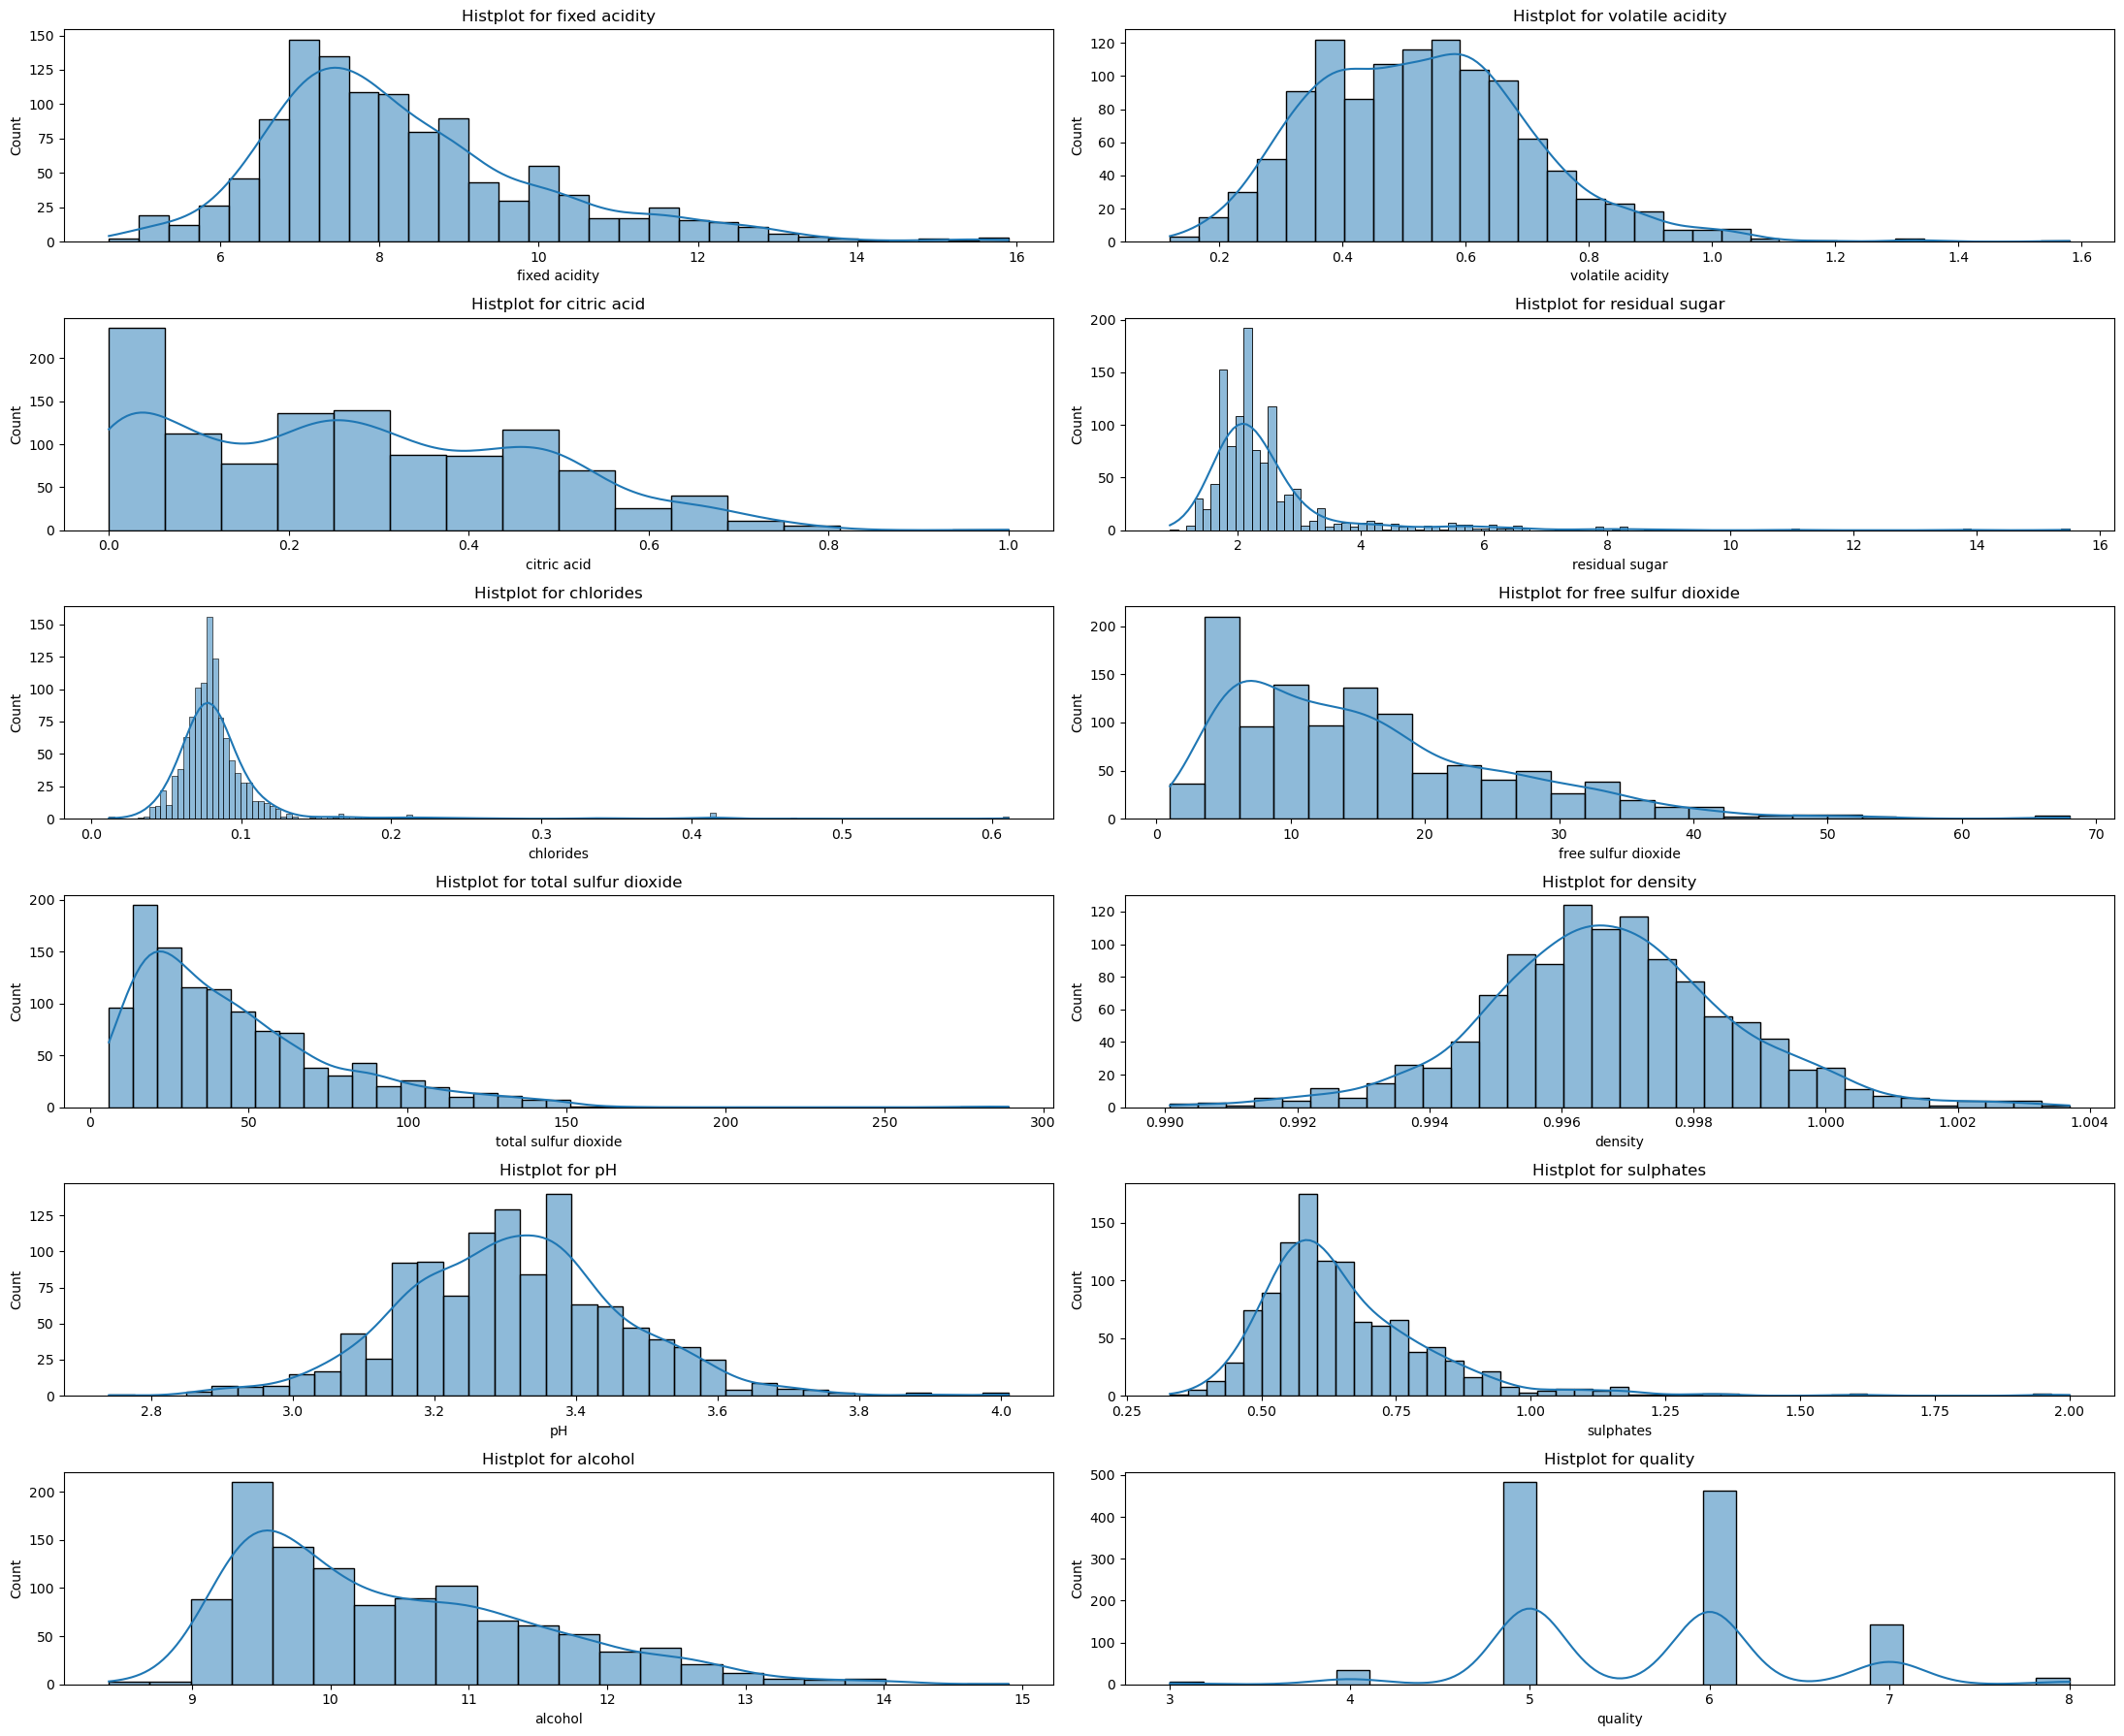

In [12]:
num_cols = df.dtypes[df.dtypes!='object'].index

plt.figure(figsize=(22,18))
for i in range(len(num_cols)):  
    plt.subplot(6,2,i+1)
    ms = sns.histplot(x=df[num_cols[i]],kde=True)
    plt.title(f'Histplot for {num_cols[i]}')
    plt.tight_layout()
plt.show()

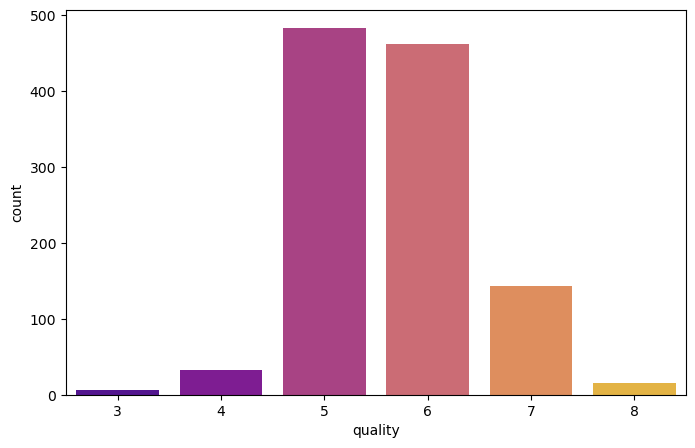

In [13]:
plt.figure(figsize=(8,5))
sns.countplot(x='quality', data=df, palette='plasma')
plt.show()

<Figure size 1500x1000 with 0 Axes>

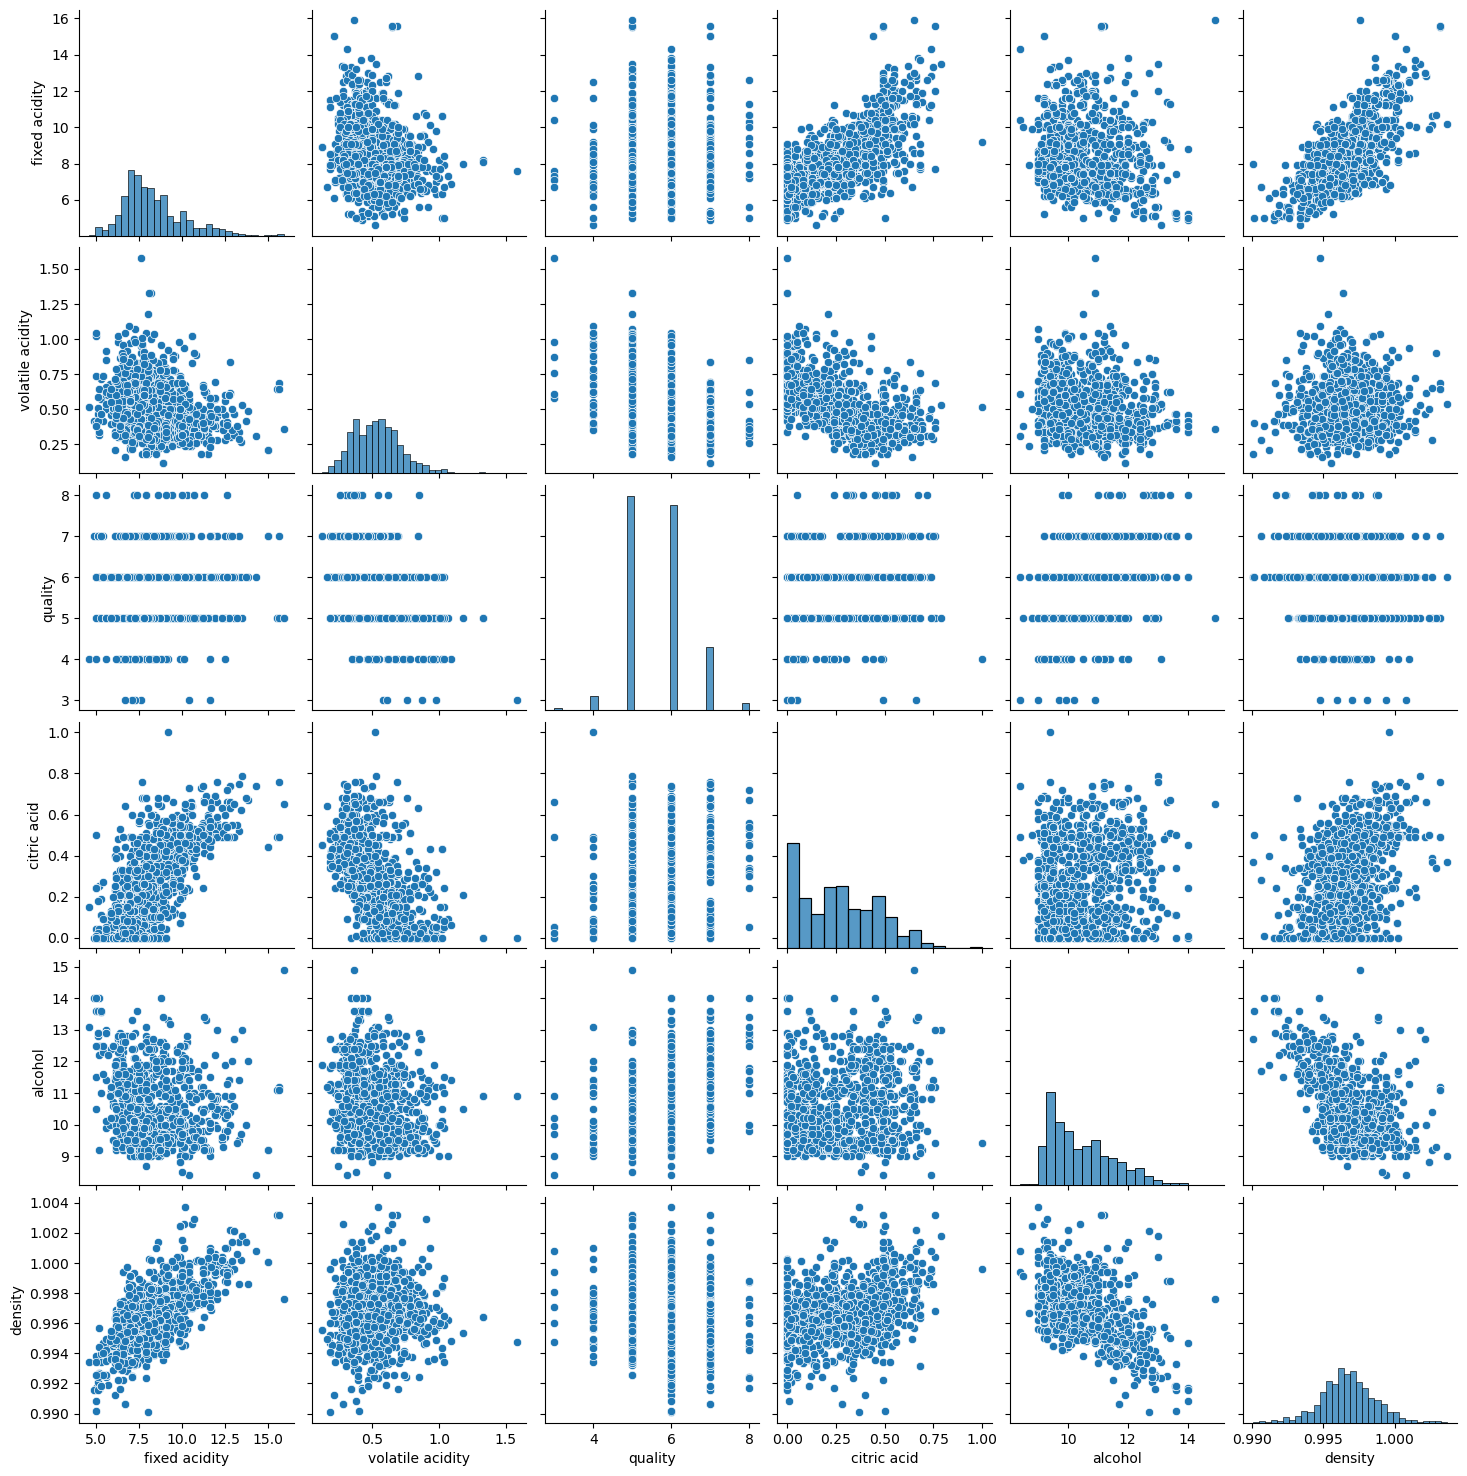

In [14]:
## Pairplot for selected features :

plt.figure(figsize=(15,10))
sns.pairplot(df[['fixed acidity', 'volatile acidity', 'quality', 'citric acid', 'alcohol', 'density']])
plt.show()

#### Correlation Matrix : used to visualise relationship of features and wine quality 

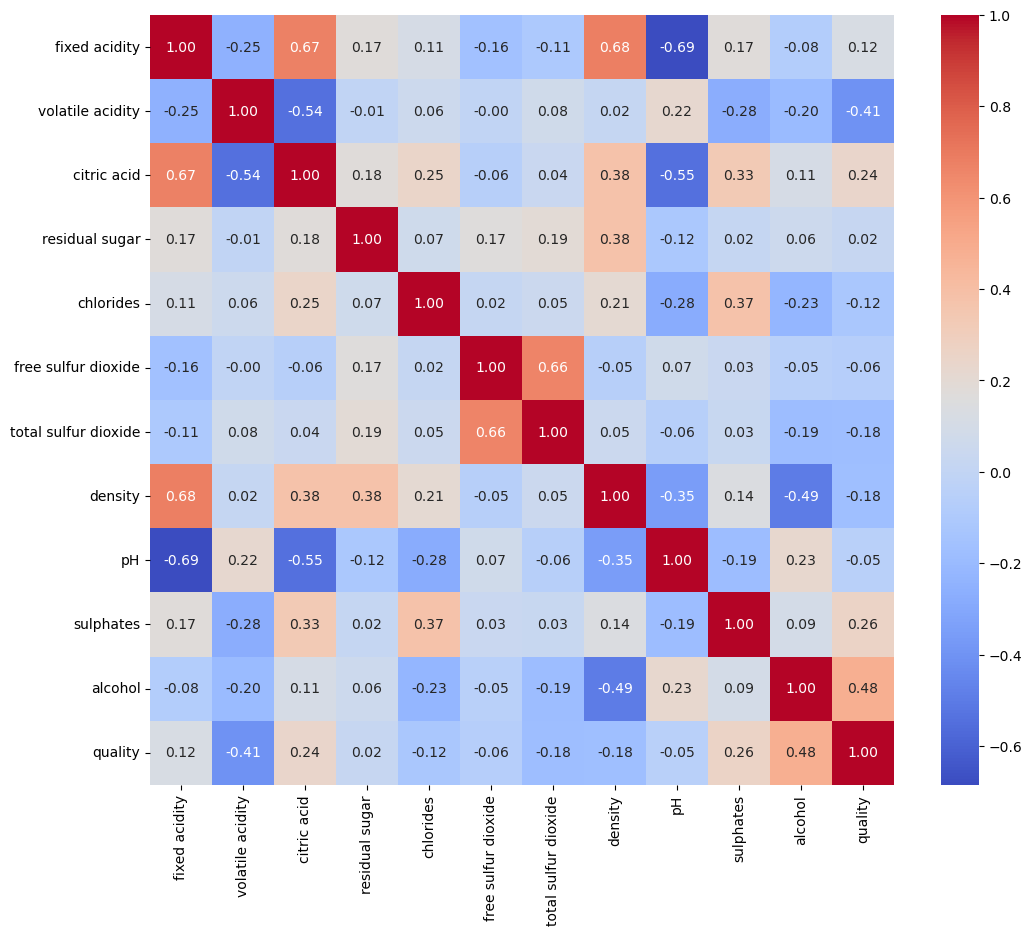

In [15]:
corr_matrix = df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

### Feature Scaling :

In [16]:
sc = StandardScaler()
sc_features = sc.fit_transform(df.drop(columns=['quality']))

sc_df = pd.DataFrame(sc_features, columns=df.columns[:-1])

## Adding back quality to scaled dataframe :
sc_df['quality'] = df['quality']

## Ensuring quality ratings are correctly labeled for classification.
sc_df['quality'] = sc_df['quality'].astype(int)

sc_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.521580,0.939332,-1.365027,-0.466421,-0.231395,-0.450467,-0.363610,0.555854,1.270695,-0.573658,-0.963382,5
1,-0.292593,1.941813,-1.365027,0.050060,0.234247,0.915920,0.643477,0.036165,-0.708928,0.130881,-0.593601,5
2,-0.292593,1.273492,-1.161568,-0.171289,0.107253,-0.060071,0.246745,0.140103,-0.325775,-0.045254,-0.593601,5
3,1.653789,-1.399789,1.483400,-0.466421,-0.252560,0.135127,0.429852,0.659792,-0.964363,-0.456235,-0.593601,6
4,-0.521580,0.939332,-1.365027,-0.466421,-0.231395,-0.450467,-0.363610,0.555854,1.270695,-0.573658,-0.963382,5


### Feature Selection : X and Y ;

In [17]:
x = sc_df.drop(columns=['quality'])
y = sc_df['quality']

#### Split Data into Training and Testing :

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### M1 : LOGISTIC REGRESSION : 

In [19]:
lr_model = LogisticRegression()

# Fit the model
lr_model.fit(x_train, y_train)

# Predictions
y_pred_lr = lr_model.predict(x_test)

# Evaluate accuracy
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression Accuracy: {accuracy_lr}")

Logistic Regression Accuracy: 0.62882096069869


### M2 : RANDOM FOREST CLASSIFIER 

In [20]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
rf_model.fit(x_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(x_test)

# Evaluate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf}")

Random Forest Accuracy: 0.6943231441048034


### M3 : Stochastic Gradient Descent (SGD)

In [21]:
sgd_model = SGDClassifier(max_iter=1000, random_state=42)

# Fit the model
sgd_model.fit(x_train, y_train)

# Predictions
y_pred_sgd = sgd_model.predict(x_test)

# Evaluate accuracy
accuracy_sgd = accuracy_score(y_test, y_pred_sgd)
print(f"SGD Classifier Accuracy: {accuracy_sgd}")

SGD Classifier Accuracy: 0.6026200873362445


### M4 : Support Vector Classifier (SVC)

In [22]:
svc_model = SVC(kernel='linear', random_state=42)

# Fit the model
svc_model.fit(x_train, y_train)

# Predictions
y_pred_svc = svc_model.predict(x_test)

# Evaluate accuracy
accuracy_svc = accuracy_score(y_test, y_pred_svc)
print(f"SVC Accuracy: {accuracy_svc}")

SVC Accuracy: 0.6200873362445415


In [23]:
### Evaluate the Models Reports :

lr_report = classification_report(y_test, y_pred_lr, zero_division=1)
rf_report = classification_report(y_test, y_pred_rf, zero_division=1)
sgd_report = classification_report(y_test, y_pred_sgd, zero_division=1)
svc_report = classification_report(y_test, y_pred_svc, zero_division=1)

print('\nLog_Reg_Report:\n', lr_report)
print('\nRandomForest_Report:\n', rf_report)
print('\nSGD_Report:\n', sgd_report)
print('\nSVC_Report:\n', svc_report)


Log_Reg_Report:
               precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.68      0.73      0.70        96
           6       0.62      0.64      0.63        99
           7       0.48      0.42      0.45        26
           8       1.00      0.00      0.00         2

    accuracy                           0.63       229
   macro avg       0.56      0.36      0.36       229
weighted avg       0.61      0.63      0.62       229


RandomForest_Report:
               precision    recall  f1-score   support

           4       1.00      0.00      0.00         6
           5       0.72      0.80      0.76        96
           6       0.67      0.66      0.66        99
           7       0.68      0.65      0.67        26
           8       1.00      0.00      0.00         2

    accuracy                           0.69       229
   macro avg       0.81      0.42      0.42       229
weighted avg       0.70      0.69   

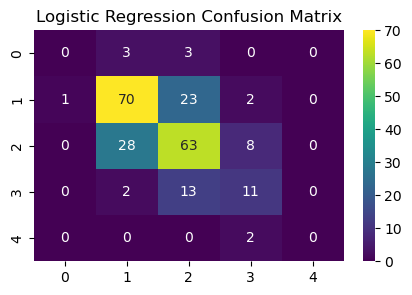

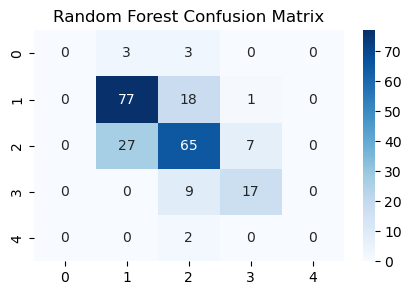

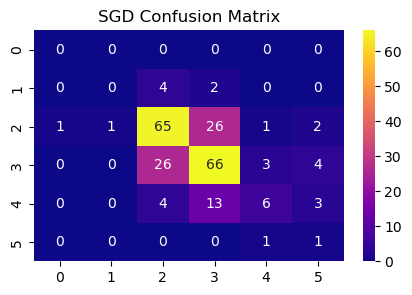

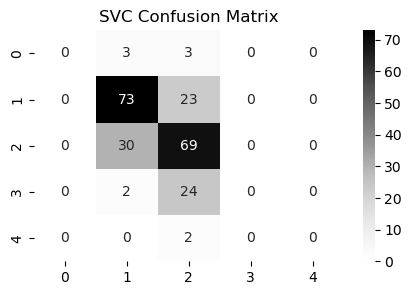

In [24]:
## Confusion Matrix :

cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(5,3))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='viridis')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(5,3))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.show()

cm_sgd = confusion_matrix(y_test, y_pred_sgd)
plt.figure(figsize=(5,3))
sns.heatmap(cm_sgd, annot=True, fmt='d', cmap='plasma')
plt.title('SGD Confusion Matrix')
plt.show()

cm_svc = confusion_matrix(y_test, y_pred_svc)
plt.figure(figsize=(5,3))
sns.heatmap(cm_svc, annot=True, fmt='d', cmap='Greys')
plt.title('SVC Confusion Matrix')
plt.show()

In [25]:
### MODEL'S COMPARISON & BEST MODEL OUT OF THEM:

models = {'Logistic Regression': accuracy_lr, 'Random Forest': accuracy_rf, 'SGD': accuracy_sgd, 'SVC': accuracy_svc}
print('Models:', models)
print()

best_model = max(models, key=models.get)
print(f"Best Model: {best_model} with Accuracy: {models[best_model]}")

Models: {'Logistic Regression': 0.62882096069869, 'Random Forest': 0.6943231441048034, 'SGD': 0.6026200873362445, 'SVC': 0.6200873362445415}

Best Model: Random Forest with Accuracy: 0.6943231441048034


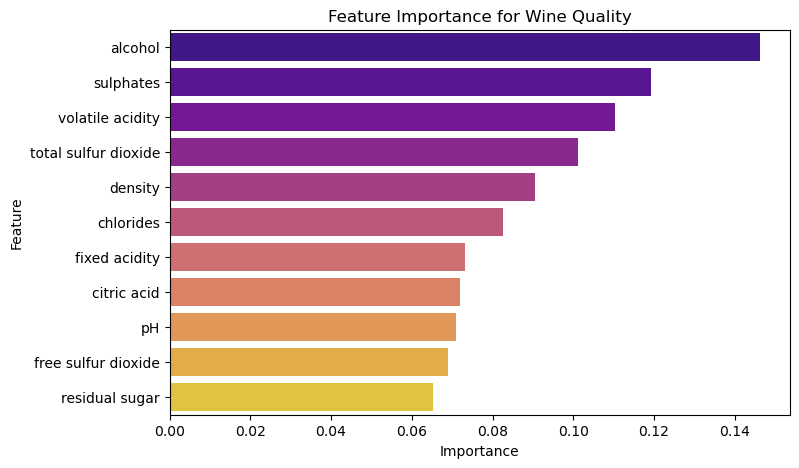

In [26]:
## Get Feature Importances :
importances = rf_model.feature_importances_
feature_names = x.columns

## Create a dataframe for visualization :
feature_importances = pd.DataFrame({'Feature' : feature_names, 'Importance' : importances})
feature_importances = feature_importances.sort_values(by='Importance',ascending=False)

## Plot Feature Importance :
plt.figure(figsize=(8,5))
sns.barplot(x='Importance', y='Feature', data=feature_importances, hue='Feature', palette='plasma', legend=False)
plt.title('Feature Importance for Wine Quality')
plt.show()

### INSIGHTS & RECOMMENDATIONS :

<b>Insights :</b></br>

1.) The RandomForest Classifier outperforms the other models with the highest accuracy of 0.69 for predicting wine quality.</br>
2.) Key Features that are influencing Wine Quality are : Alcohol, Sulphates, Volatile Acidity, Total Sulphur Dioxide.</br>
3.) Higher Quality Wines are having high alcohol content and lower volatile acidity.</br>


<b>Recommendations :</b></br>

1.) Optimize model performance with hyperparameter tuning and address class imbalances using oversampling or weighted adjusted.</br>
2.) Focus on accurate measurement of alcohol and sulphates during wine making to improve quality.</br>
3.) Consider removing low-impact features like residual sugar, free sulfur dioxide, etc.</br>